<a href="https://colab.research.google.com/github/Jayeshj2212/Machine-Learning-Problem-Statements/blob/main/NLP_Tutorials_1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


            **NLP Tutorials**



Source: OpenSource

Target Audience:

Anyone new or zero in NLP can start with us and follow this series of articles.

Prerequisite: Python Basic Understanding

Libraries Used: Keras, Tensorflow, Scikit learn, NLTK, Glove, etc.

We will cover the below topics:
1. Raw data processing (Data cleaning)
2. Tokenization and StopWords
3. Feature Extraction techniques
4. Topic Modelling and LDA
5.Word2Vec (word embedding)
6. Continuous Bag-of-words(CBOW)
7. Global Vectors for Word Representation (GloVe)
8. text Generation,
9. Transfer Learning

In [3]:
#Importing Libraries for converting the raw text data into a pandas data frame and performing various data cleaning techniques.

import pandas as pd

In [4]:
text = ['This is the NLP TASKS ARTICLE written by ABhishek Jaiswal**' , 'IN this article I”ll be explaining various DATA-CLEANING techniques',
 'So stay tuned for FURther More &&','Nah I don"t think he goes to usf, he lives around']

In [5]:
df = pd.DataFrame({'text':text})

In [6]:
df['lower'] = df['text'].apply(lambda x: "".join(x.lower()))

In [7]:
df

,text,lower
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...
1,IN this article I”ll be explaining various DAT...,in this article i”ll be explaining various dat...
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
#string.punctuation returns a string containing all punctuations.
df.text.apply(lambda x: "".join(i for i in x if i not in string.punctuation))

0    This is the NLP TASKS ARTICLE written by ABhis...
1    IN this article I”ll be explaining various DAT...
2                      So stay tuned for FURther More 
3      Nah I dont think he goes to usf he lives around
Name: text, dtype: object

In [10]:
#Removing punctuation using regular expressions:
import re
df.text.apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]',x)))

0    This is the NLP TASKS ARTICLE written by ABhis...
1    IN this article Ill be explaining various DATA...
2                      So stay tuned for FURther More 
3     Nah I don"t think he goes to usf he lives around
Name: text, dtype: object

In [11]:
"""
Stop Words Removal
Words that frequently occur in sentences and carry no significant meaning in sentences.

Note: Before filtering stopwords, make sure you lowercase the data since our stopwords are lowercase.
"""
# --> importing NLTK ( Natural Language Toolkit)

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# --> storing NLTK in Variable

allstopwords = stopwords.words('english')
df.lower.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))



0         nlp tasks article written abhishek jaiswal**
1    article i”ll explaining various data-cleaning ...
2                                        stay tuned &&
3               nah don"t think goes usf, lives around
Name: lower, dtype: object

In [12]:
"""
Spelling Correction

Correcting spelling mistakes improves model accuracy.

There are various libraries to fix spelling mistakes, but the most convenient method is to use a text blob.

The method correct() works on text blob objects and corrects the spelling mistakes.

"""

from textblob import TextBlob

df['lower'].apply(lambda x: str(TextBlob(x).correct()))

0    this is the nap tasks article written by abhis...
1    in this article i”ll be explaining various dat...
2                    so stay tuned for further more &&
3      ah i don"t think he goes to us, he lives around
Name: lower, dtype: object

In [13]:
"""

Tokenization
Tokenization means splitting text into meaningful unit words. There are sentence tokenizers as well as word tokenizers.

Sentence tokenizer splits a paragraph into --> meaningful sentences,
while word tokenizer splits a sentence into --> unit meaningful words.
Many libraries can perform "tokenization" like [SpaCy, NLTK, and TextBlob].

"""
#nltk.download('punkt')

mystring = "My favorite animal is cat"

nltk.word_tokenize(mystring)
mystring.split(" ")


['My', 'favorite', 'animal', 'is', 'cat']

In [14]:
"""
Stemming
Stemming is converting words into their root word using some set of rules irrespective of meaning. I.e.,

“fish,” “fishes,” and “fishing” are stemmed into “fish”.
“playing”, “played”,” plays” are stemmed into “play”.

Stemming helps to reduce the vocabulary hence improving the accuracy.
The simplest way to perform stemming is to use NLTK or a TextBlob library.

"""

from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))



0    thi is the nlp task articl written by abhishek...
1    in thi articl i”ll be explain variou data-clea...
2                     so stay tune for further more &&
3      nah i don"t think he goe to usf, he live around
Name: text, dtype: object

In [15]:
"""

Lemmatization
Lemmatization is converting words into their root word using vocabulary mapping.

For Example -

“good,” “better,” or “best” is lemmatized into “good“.
Lemmatization will convert all synonyms into a single root word. i.e. “automobile“, “car“,” truck“,” vehicles” are lemmatized into “automobile”.
Lemmatization usually gets better results.

Lemmatization can be done using NLTK, TextBlob library.
"""
#nltk.download('wordnet')

from textblob import Word

w = Word('played')

wl = w.lemmatize("v")

print(wl)



play


In [16]:
# Now Lemmatize the whole dataset.

df['processed']=df.lower.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

,text,lower,processed
0,This is the NLP TASKS ARTICLE written by ABhis...,this is the nlp tasks article written by abhis...,this is the nlp task article written by abhish...
1,IN this article I”ll be explaining various DAT...,in this article i”ll be explaining various dat...,in this article i”ll be explaining various dat...
2,So stay tuned for FURther More &&,so stay tuned for further more &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around","nah i don""t think he go to usf, he life around"


In [17]:
"""
Step 2 Exploratory Data Analysis
------------------------------------------------------

Performing EDA with pandas_profiling library for more

!pip install pandas-profiling

"""
import pandas_profiling as pp

# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(df)
profile
#profile.to_file("\output.html")

<ipython-input-17-af06e5b68509>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

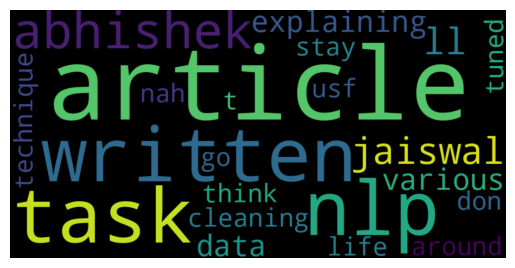

In [18]:
"""

Word Cloud
Wordcloud is the pictorial representation of the word frequency of the dataset.WordCloud is easier to understand and gives a better idea about our textual data.


"""

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# We can draw a word cloud using text containing all the words of our data.

words = []
for message in df['processed']:
    words.extend([word for word in message.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




**EndNotes**
In this article, we saw various necessary techniques for textual data preprocessing
